# Graphs

Basic imports

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

## Basic graph representation and plotting

### Undirected graph

Undirected graphs are represented as sets of nodes and edges

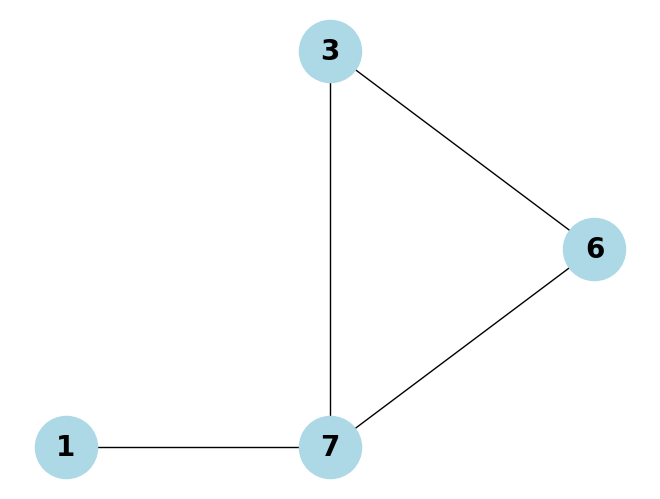

In [133]:
g = nx.Graph()
g.add_nodes_from([1, 3, 7, 6])
g.add_edges_from([(1, 7), (3, 6), (3,7), (6,7)])
draw_params = { 'with_labels': True, 'node_size': 2000, 'node_color': 'lightblue', 'font_size': 20, 'font_color': 'black', 'font_weight': 'bold' }
gpos = pos={ 1: (0,0), 3: (1,1), 7: (1,0), 6: (2, 0.5) }
nx.draw(g, pos = gpos, **draw_params)

In [41]:
print(f'''
    g.nodes = {g.nodes}
    g.edges = {g.edges}
    g.degree = {g.degree}
    g.adj = {g.adj}
    '''
)


    g.nodes = [1, 3, 7, 6]
    g.edges = [(1, 7), (3, 6), (3, 7), (7, 6)]
    g.degree = [(1, 1), (3, 2), (7, 3), (6, 2)]
    g.adj = {1: {7: {}}, 3: {6: {}, 7: {}}, 7: {1: {}, 3: {}, 6: {}}, 6: {3: {}, 7: {}}}
    



      nx.is_path(g, [1,7,3,6]) = True
      nx.is_path(g, [1,3,6]) = False
      nx.shortest_path(g, 1, 6) = [1, 7, 6]
      nx.simple_cycles(g) = [[7, 3, 6]]
      nx.is_connected(g) = True
      gp = {1: {7: {}}, 3: {6: {}, 7: {}}, 7: {1: {}, 3: {}, 6: {}}, 6: {3: {}, 7: {}}, 99: {}}
      nx.is_connected(gp) = False
      nx.connected_components(gp) = [{1, 3, 6, 7}, {99}]
      nx.has_path(gp, 1, 99) = False (rechability check)
      


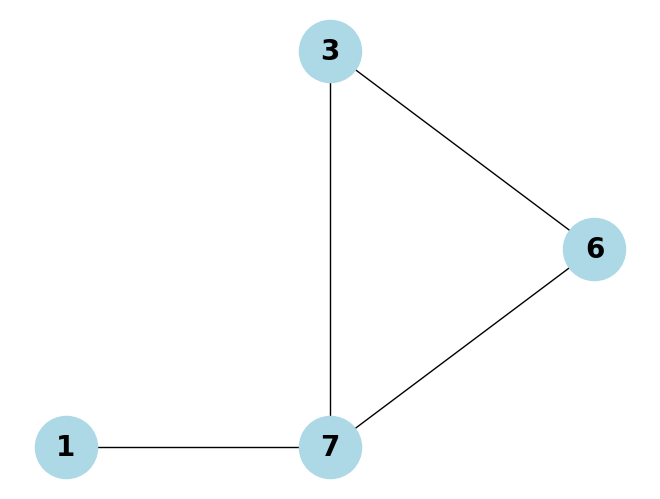

In [42]:
nx.draw(g, pos = gpos, **draw_params)
gp = g.copy()
gp.add_node(99)
print(f'''
      nx.is_path(g, [1,7,3,6]) = {nx.is_path(g, [1,7,3,6])}
      nx.is_path(g, [1,3,6]) = {nx.is_path(g, [1,3,6])}
      nx.shortest_path(g, 1, 6) = {nx.shortest_path(g, 1, 6)}
      nx.simple_cycles(g) = {list(nx.simple_cycles(g))}
      nx.is_connected(g) = {nx.is_connected(g)}
      gp = {gp.adj}
      nx.is_connected(gp) = {nx.is_connected(gp)}
      nx.connected_components(gp) = {list(nx.connected_components(gp))}
      nx.has_path(gp, 1, 99) = {nx.has_path(gp, 1, 99)} (rechability check)
      ''')

#### Basic graph manipulation functions

{1: {2: {'weight': 0.5}}, 2: {1: {'weight': 0.5}}, 3: {}, 4: {}}


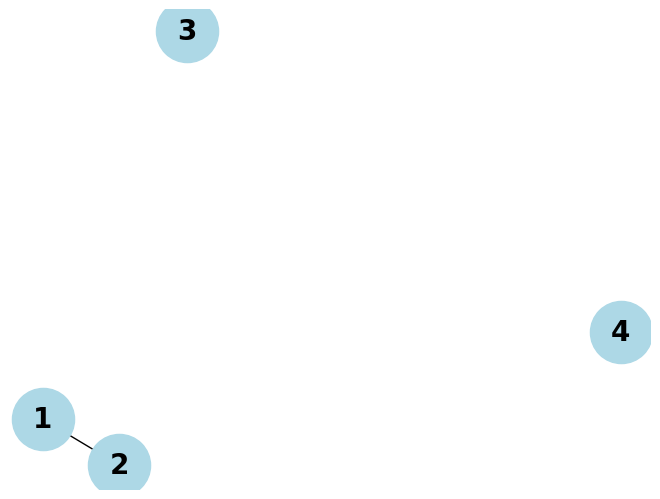

In [141]:
g = nx.Graph()
g.add_node(0)
g.add_edge(1, 2) # adds missing nodes automatically beside the edge
g.add_edges_from([(0,1), (3,4)])
g.add_weighted_edges_from([(1, 2, 0.5)])
g.remove_node(0) # also removes the edge
g.remove_edge(3,4)

print(g.adj)
nx.draw(g, **draw_params)

#### Properties of graphs


In [152]:
H = nx.path_graph(5) 
print(H.nodes)  # [0, 1, 2, 3, 4]
print(H.edges)  # [(0, 1), (1, 2), (2, 3), (3, 4)]
print(H.adj)    # {0: {1:{}}, 1: {0: {}, 2:{}}, ...}
print(H.degree) # [(0, 1), (1, 2), (2, 2), (3, 2), (4, 1)]
print(H.number_of_nodes()) # 5
print(H.number_of_edges()) # 4
print(H.has_node(1)) # True

[0, 1, 2, 3, 4]
[(0, 1), (1, 2), (2, 3), (3, 4)]
{0: {1: {}}, 1: {0: {}, 2: {}}, 2: {1: {}, 3: {}}, 3: {2: {}, 4: {}}, 4: {3: {}}}
[(0, 1), (1, 2), (2, 2), (3, 2), (4, 1)]
5
4
True


One can get edges or degree from a subset of all nodes using an **nbunch**, which may be (1) `None`, meaning all nodes, (2) a node, or (3) an iterable of nodes

In [153]:
print(f'''
      H.degree = {H.degree}
      H.degree(None) = {H.degree(None)}
      H.degree[1] = {H.degree[1]}
      H.degree([0,1]) = {H.degree([0,1])}
      H.edges([2,'xxx',0]) = {H.edges([2,'xxx',0])}
      ''')


      H.degree = [(0, 1), (1, 2), (2, 2), (3, 2), (4, 1)]
      H.degree(None) = [(0, 1), (1, 2), (2, 2), (3, 2), (4, 1)]
      H.degree[1] = 2
      H.degree([0,1]) = [(0, 1), (1, 2)]
      H.edges([2,'xxx',0]) = [(2, 1), (2, 3), (0, 1)]
      


### Directed graph


        dg.adj = {1: {1: {}, 7: {}}, 3: {6: {}}, 7: {3: {}}, 6: {7: {}}}
        nx.is_connected(dg.to_undirected()) = True (not available on digraphs)
        nx.is_weakly_connected(dg) = True
        nx.is_strongly_connected(dg) = False
        nx.strongly_connected_components(dg) = [{3, 6, 7}, {1}]
        nx.density(dg) = 0.4166666666666667
        nx.density(nx.complete_graph(4)) = 1.0
        


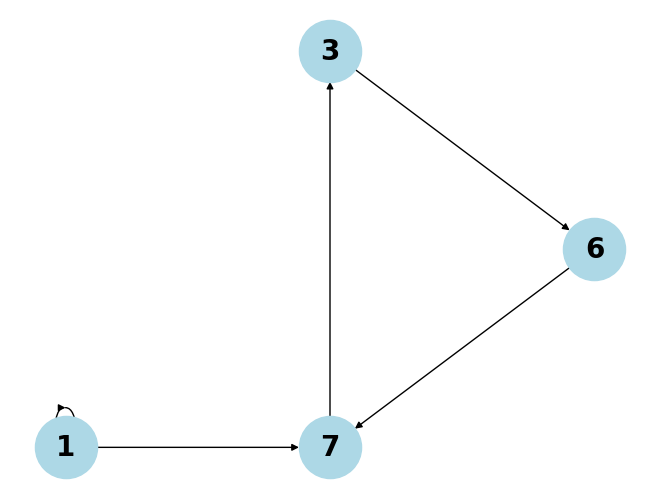

In [44]:
dg = nx.DiGraph()
dg.add_nodes_from([1, 3, 7, 6])
dg.add_edges_from([(1, 1), (1, 7), (7, 3), (3, 6), (6, 7)])
nx.draw(dg, pos = gpos, **draw_params)
print(f'''
        dg.adj = {dg.adj}
        nx.is_connected(dg.to_undirected()) = {nx.is_connected(dg.to_undirected())} (not available on digraphs)
        nx.is_weakly_connected(dg) = {nx.is_weakly_connected(dg)}
        nx.is_strongly_connected(dg) = {nx.is_strongly_connected(dg)}
        nx.strongly_connected_components(dg) = {list(nx.strongly_connected_components(dg))}
        nx.density(dg) = {nx.density(dg)}
        nx.density(nx.complete_graph(4)) = {nx.density(nx.complete_graph(4))}
        ''')

### Representation: adjacency lists and adjacency matrices


    g.adj = {1: {7: {}}, 3: {6: {}, 7: {}}, 7: {1: {}, 3: {}, 6: {}}, 6: {3: {}, 7: {}}}
    nx.adjacency_matrix(g).todense() = 
[[0 0 1 0]
 [0 0 1 1]
 [1 1 0 1]
 [0 1 1 0]]
    dg.adj = {1: {1: {}, 7: {}}, 3: {6: {}}, 7: {3: {}}, 6: {7: {}}}
    nx.adjacency_matrix(dg).todense() = 
[[1 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 1 0]]
    


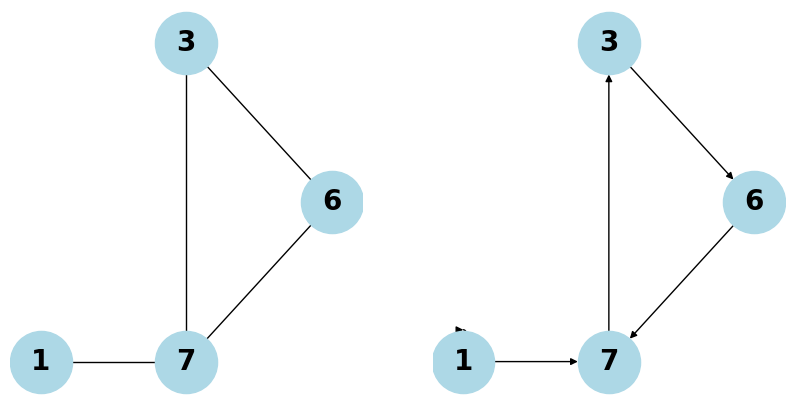

In [ ]:
fix, axes = plt.subplots(1, 2, figsize=(10, 5))
nx.draw(g, pos = gpos, ax=axes[0], **draw_params)
nx.draw(dg, pos = gpos, ax=axes[1], **draw_params)
print(
    f'''
    g.adj = {g.adj}
    nx.adjacency_matrix(g).todense() = \n{nx.adjacency_matrix(g).todense()}
    dg.adj = {dg.adj}
    nx.adjacency_matrix(dg).todense() = \n{nx.adjacency_matrix(dg).todense()}
    ''')

### Graph/node/edgee attributes

Graphs, nodes, and edges can be given **attributes** attached to them. This can be achieved by accessing to the following views on a graph `g`:

* `g.graph`
* `g.nodes`
* `g.edges`

Note that:

* indexing the graph object **`g[n]`** allows you to get the **dictionary of neighbours** of node `n`
    * this is **the same as `g.adj[n]`**
    * this is **different from `g.nodes[n]`**, which gets the data associated to a node
* the neighbour dict is indexed to the edge-data dict, so that **`g[a][b]`** gets the **data dictionary of the edge** `(a,b)`
    * `G.edges[a,b] == G[a][b]`

In [ ]:
# Attaching attributes to whole graphs
G = nx.Graph(day="Friday")
G.graph # {'day':'Friday'}
G.graph['day'] = 'Monday'
print(G.graph) # {'day': 'Monday'}

{'day': 'Monday'}


In [ ]:
# Attaching attributes to nodes
G.add_node(2, time='5pm')
G.add_nodes_from([4], time='2pm', another='foo')
print('G = ', G)
print('G.nodes = ', G.nodes) # [2,4]
print('G.nodes[4] = ', G.nodes[4]) # gets the node data
print(G.nodes.data(data=False)) # [2,4]
print('G.nodes.data() = ', G.nodes.data()) # [(2, {'time': '5pm'}), (4, {'time': '2pm', 'another': 'foo'})]
print('dict(G.nodes.data()) = ', dict(G.nodes.data()))

G =  Graph with 5 nodes and 2 edges
G.nodes =  [2, 4, 1, 3, 0]
G.nodes[4] =  {'time': '2pm', 'another': 'foo'}
[2, 4, 1, 3, 0]
G.nodes.data() =  [(2, {'time': '5pm'}), (4, {'time': '2pm', 'another': 'foo'}), (1, {}), (3, {}), (0, {})]
dict(G.nodes.data()) =  {2: {'time': '5pm'}, 4: {'time': '2pm', 'another': 'foo'}, 1: {}, 3: {}, 0: {}}
{1: {'foo': 'bar'}} {1: {'foo': 'bar'}}


In [79]:
# Attaching attributes to edges

G.add_edge(1, 3, weight=4.7)
G.add_edges_from([(0,1)], foo='bar')
G[1][3]['color'] = "blue"
# G[1]['foo'] = 'bar' # you can't assign attributes to nodes this way
# G[1,3]['foo'] = 'bar' # you can't assign attributes to edges this way either
print('G.adj = ', G.adj)
print('G[1] = ', G[1])
print('G[1][3] = ', G[1][3])
G.edges[1, 3]['color'] = "red"
print('G.edges.data() = ', G.edges.data()) # [(0, 1, {'foo': 'bar'}), (1, 3, {'color': 'red', 'weight': 4.7})]
print('G.nodes.data() = ', G.nodes.data())
print('G.edges[1,3] = ', G.edges[1,3])
print(G.edges[1,3] == G[1][3])

G.adj =  {2: {}, 4: {}, 1: {3: {'weight': 4.7, 'color': 'blue'}, 0: {'foo': 'bar'}}, 3: {1: {'weight': 4.7, 'color': 'blue'}}, 0: {1: {'foo': 'bar'}}}
G[1] =  {3: {'weight': 4.7, 'color': 'blue'}, 0: {'foo': 'bar'}}
G[1][3] =  {'weight': 4.7, 'color': 'blue'}
G.edges.data() =  [(1, 3, {'weight': 4.7, 'color': 'red'}), (1, 0, {'foo': 'bar'})]
G.nodes.data() =  [(2, {'time': '5pm'}), (4, {'time': '2pm', 'another': 'foo'}), (1, {}), (3, {}), (0, {})]
G.edges[1,3] =  {'weight': 4.7, 'color': 'red'}
True


### Weighted graphs


{('A', 'B'): Text(0.5, 0.75, '1'),
 ('A', 'F'): Text(0.5, 0.25, '3'),
 ('B', 'C'): Text(1.5, 1.0, '3'),
 ('B', 'E'): Text(1.5, 0.5, '5'),
 ('B', 'F'): Text(1.0, 0.5, '1'),
 ('C', 'D'): Text(2.5, 0.75, '2'),
 ('D', 'E'): Text(2.5, 0.25, '1'),
 ('D', 'F'): Text(2.0, 0.25, '6'),
 ('E', 'F'): Text(1.5, 0.0, '2')}

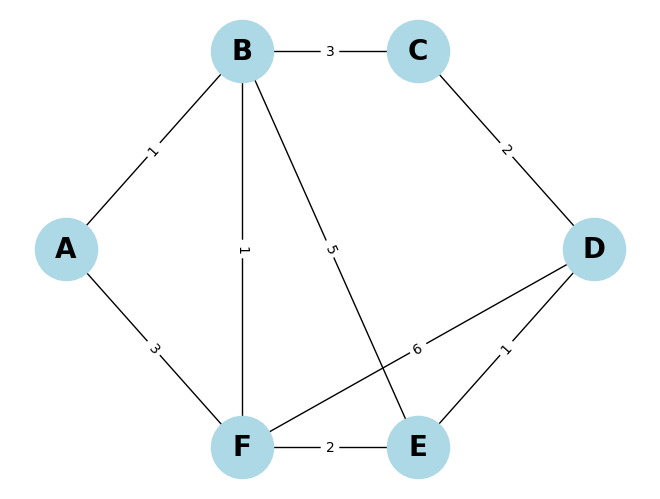

In [49]:
gw = nx.Graph()
gw.add_nodes_from(list('ABCDEF'))
gw.add_weighted_edges_from([('A','B',1), ('A','F',3), ('B','C',3), ('B','E',5), ('B','F',1), 
                           ('C','D',2), ('D','E',1), ('D','F',6), ('E','F',2)], )
pos = { 'A': (0,0.5), 'B': (1,1), 'C': (2,1), 'D':(3,0.5), 'E':(2,0), 'F':(1,0) }
edge_labels = nx.get_edge_attributes(gw, 'weight')
nx.draw(gw, pos = pos, **draw_params)
nx.draw_networkx_edge_labels(gw, pos, edge_labels=edge_labels)

### Graph factories/generators

See [graph generators doc](https://networkx.org/documentation/stable/reference/generators.html).

[(0, 1), (1, 2), (2, 3), (3, 4)]


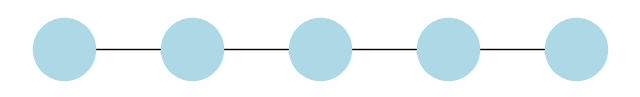

In [155]:
pg = nx.path_graph(5)
print(pg.edges)
fig, ax = plt.subplots(figsize=(8,1))
nx.draw(pg, pos=[(x,0) for x in pg.nodes], ax=ax, **draw_params)

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


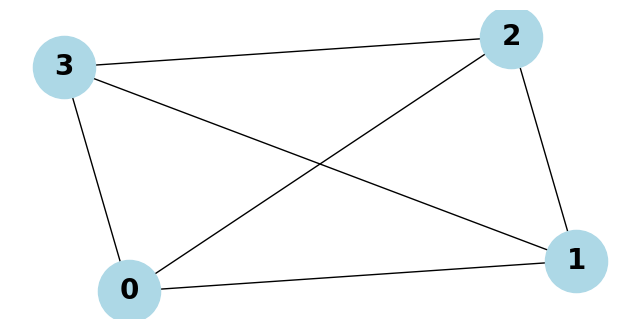

In [115]:
cg = nx.complete_graph(4)
print(cg.edges)
fig, ax = plt.subplots(figsize=(8,4))
nx.draw(cg, ax=ax, **draw_params)

[(0, 1), (0, 3), (1, 2), (2, 3)]


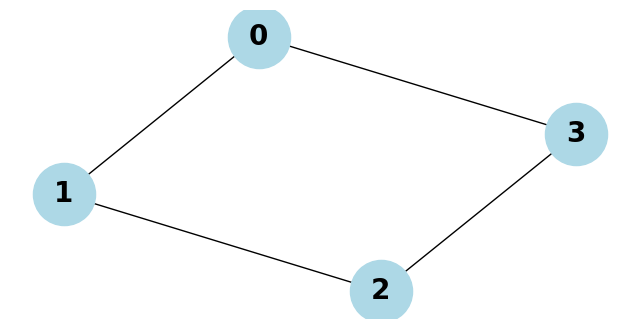

In [114]:
cyg = nx.cycle_graph(4)
print(cyg.edges)
fig, ax = plt.subplots(figsize=(8,4))
nx.draw(cyg, ax=ax, **draw_params)

[] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


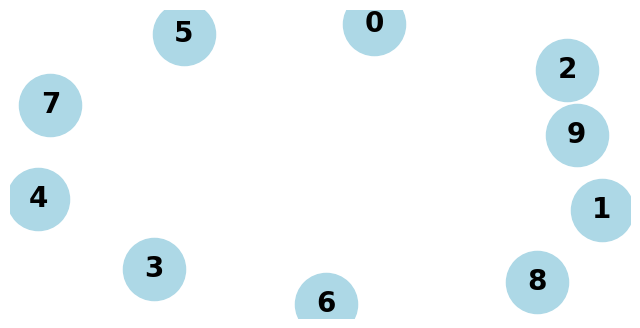

In [118]:
emptyg = nx.empty_graph(10)
print(emptyg.edges, emptyg.nodes)
fig, ax = plt.subplots(figsize=(8,4))
nx.draw(emptyg, ax=ax, **draw_params)

[(0, 1), (0, 2), (0, 3), (0, 4)]


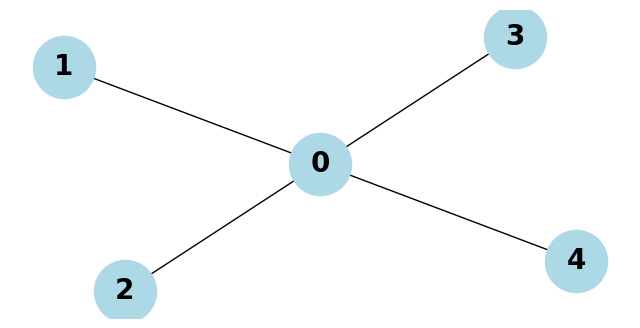

In [119]:
sg = nx.star_graph(4)
print(sg.edges)
fig, ax = plt.subplots(figsize=(8,4))
nx.draw(sg, ax=ax, **draw_params)

[(0, 3), (0, 4), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]


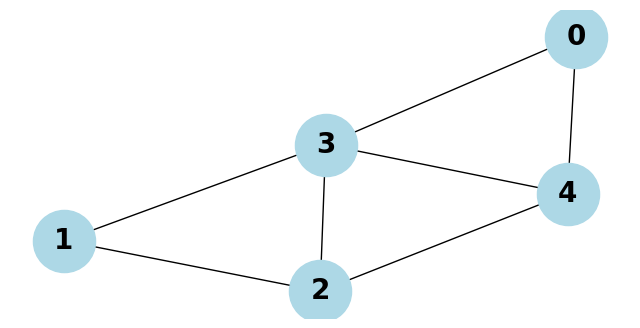

In [128]:
rg = nx.gnp_random_graph(5, 0.75, seed=0)
print(rg.edges)
fig, ax = plt.subplots(figsize=(8,4))
nx.draw(rg, ax=ax, **draw_params)

[(0, 2), (1, 4), (1, 2), (2, 3), (3, 4)]


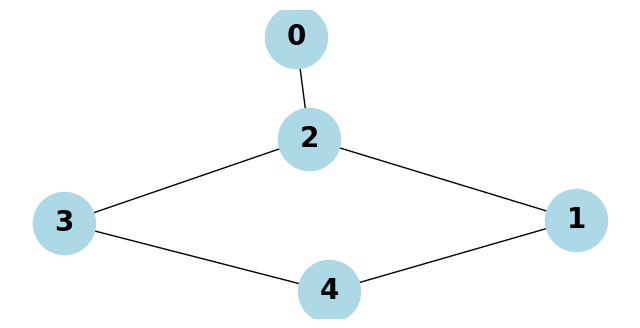

In [130]:
rlg = nx.gnm_random_graph(5, 5, seed=0)
print(rlg.edges)
fig, ax = plt.subplots(figsize=(8,4))
nx.draw(rlg, ax=ax, **draw_params)

## Plotting

/tmp/ipykernel_54859/3731942145.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


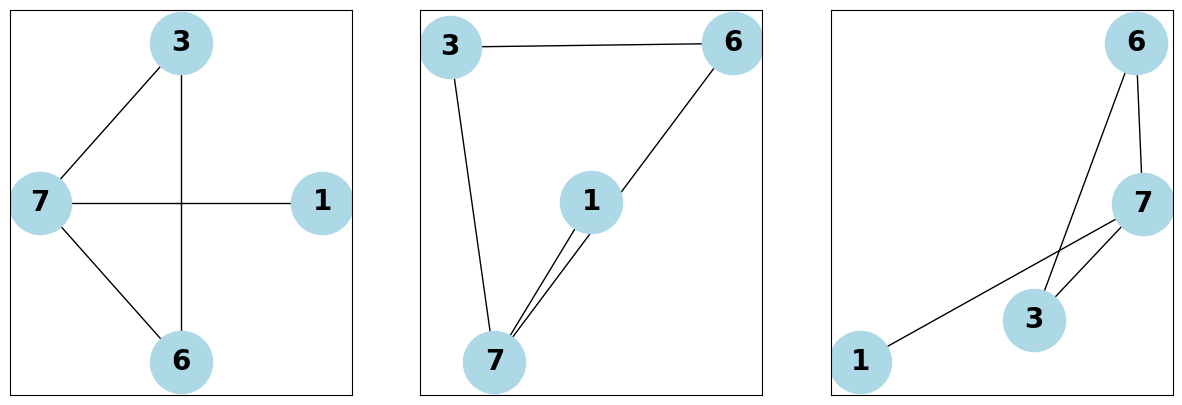

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
nx.draw_networkx(g, pos = nx.circular_layout(g), ax = axes[0], **draw_params)
nx.draw_networkx(g, pos = nx.random_layout(g), ax = axes[1], **draw_params)
nx.draw_networkx(g, pos = nx.spiral_layout(g), ax = axes[2], **draw_params)
fig.show()
